# **New Jersey Institute of Technology**
# DS 675: Machine Learning, Spring 2023
 
*   Instructor: Dr. Przemyslaw Musialski
*   TA: Haotian Yin
 
# Assignment 3
* Date: 2/21/2022
* **Due: 3/7/2022, 11:59pm EST**
* Total possible points: 30. 
 
 
## Instructions
*   Copy it locally or edit it as a copy in your Google-Colab (File-->Save a Copy in Drive). 
*   Look for notebook cells starting with **"Task #"**. **Edit only in the indicated areas!** Do not forget to write brief documentation for each task in the dedicated cell areas. **Do not edit in other areas!**
*   Delivery Method: Upload a Jupyter notebook following the suggested name convention. 
*   Note: you can access the file only with your NJIT-Google-Account.  **Private accounts will not have access**. 
*   Submit your solution on CANVAS. Late submissions are penalized with 10% of total points per day. 
 
 
## Academic Policy
A set of ethical principles governing this course:
*   It is okay to share information and knowledge with your 
colleagues, but
*   **It is not okay** to share the code,
*   **It is not okay** to post or give out your code to others (also in the future!),
*   **It is not okay** to use code from others (also from the past) for this Assignment!
 
**Any noticed disregard of these principles will be sanctioned** as per the Academic Integrity Policy of NJIT (http://www5.njit.edu/policies/sites/policies/files/academic-integrity-code.pdf).
 
 
## Late Policy
Late submissions are penalized with 10% of total points per day.
 

## Remarks

Remark: I recommend to study the tutorials from the book "Python Data Science Handbook" on Colab: 
https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb

In particular for this assigment we will use 
*   PCA: https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb


In [1]:
#@title Imports and Helper and Visualization Functions

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    """Plot the decision boundary of DecisionTree"""
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    # plt.axis('equal')
    # ax.axis('off')    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    # ax.set(xlim=xlim, ylim=ylim)

---
## Data Loading and Preprocessing

We are using the Seaborn libary for data loading and preprocessing: https://seaborn.pydata.org/introduction.html

For this assigment we use the well known 'Iris Flower'-Dataset, which is well known in the ML community as a testing set (https://en.wikipedia.org/wiki/Iris_flower_data_set)



In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# for this excersise we remove the  'setosa' species
iris = iris.loc[iris['species'] != 'setosa']

The next command `pairplot`. By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column. See: https://seaborn.pydata.org/generated/seaborn.pairplot.html

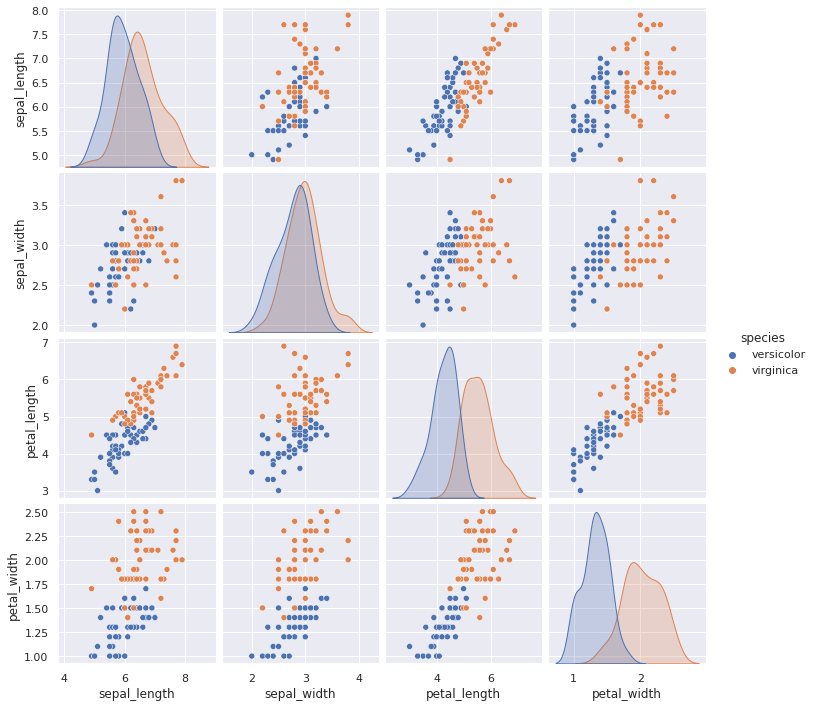

In [4]:
sns.pairplot(iris, hue='species', height=2.5);

For use in Scikit-Learn, we will extract the features matrix and target array from the seaborn dataframe and store them in numpy arrays

In [5]:
X_data = iris.drop('species', axis=1)
X_data = X_data.to_numpy()
X_data.shape


(100, 4)

In [6]:
# create a numeric arrays for the 3 species
y_data = iris.species.replace({'setosa': 2, 'versicolor': 1, 'virginica': 0}, inplace=False)
y_data = y_data.to_numpy()
y_data.shape


(100,)

In [7]:
## uncommend it if you want to try other data
# from sklearn.datasets import make_circles
# X_data, y_data = make_circles(100, factor=.8, noise=.3)

---
## Task 1: Unsupervised learning example: Iris dimensionality [8 points]

As an example of an unsupervised learning problem, let's take a look at reducing the dimensionality of the Iris data so as to more easily visualize it.
Recall that the Iris data is four dimensional: there are four features recorded for each sample.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data.
Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis (PCA; see [In Depth: Principal Component Analysis](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb)), which is a fast linear dimensionality reduction technique.
We will ask the model to return two components—that is, a two-dimensional representation of the data.

Your taks is to reduce the given dataset to 2-dimensional features using PCA. 

In [8]:
### Task 1: your code goes here [8 points]
# 

# n_components = 2
# eigenvector_subset = sorted_eigenvectors[:,0:n_components]
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_data_2D =pca.fit_transform(X_data)
## replace the line below and assign PCA-projected 2D points to X_data_2D
## note, if you do not manage Tasks 1 and/or 2, leave the line and continue with other tasks, 
## however, solution to Task 1 (and/or 2) is recommended for better accuracy!


### Document Task 1 [2 points of 8]

PCA is a dimension reduction technique. In Iris dataset we have 4 dimensions so,by using PCA we changed the dimensions from four to two. And assigned it to X_data_2d


---
##Task 2: My PCA [14 points]
Using the knowledge from the lectures, implment your own PCA function using only numpy routiens. Use the `np.linalg.eig` function to compute the eigenvalues and eigenvectors of the covariance matrix. 

Remark 1: Do not forget to sort the eigenvalues and eigenvectors. 

Remark 2: If your results to not match with the PCA algorithm from Scikit-learn, the eigenvectors just might points in opposite direction, in other words, differ by the sign. This solution is still correct. 

In [9]:
###  Task 2: implement the function
def mypca(X, k=2):
    Xk=X
    Xk = Xk-np.mean(Xk,axis=0)
    cova=np.cov(Xk.T)
    evalues,evectors=np.linalg.eig(cova)
    sorted=np.argsort(evalues)[::-1]
    evalues=evalues[sorted]
    evectors=evectors[:,sorted]
    Xk=Xk.dot(evectors[:,:k])
    # implement PCA 

    return Xk

In [10]:
Xk = mypca(X_data, k=2)

print(Xk[0:4,:])
print('--')
print(X_data_2D[0:4,:])
print('--')
# the value below should be close to 0
print(np.sum(Xk-X_data_2D))

[[ 0.23000653  0.79246422]
 [-0.22029451  0.34809451]
 [ 0.33647186  0.59107214]
 [-1.32483876 -0.08256375]]
--
[[ 0.23000653 -0.79246422]
 [-0.22029451 -0.34809451]
 [ 0.33647186 -0.59107214]
 [-1.32483876  0.08256375]]
--
-1.0658141036401503e-14


### Document Task 2 [4 points of 14]
Instead of using inbuilt pca .Here we generated pca data using covariance matrix,eigenvalues and eigenvectors. After We obtain eigen values and eigen vectors we need to sort thdem in decreasing order. And, we need to take the first k vectors. Here we have taken k=2 . so we reduced the dimensions from 4 to 2 dimensions .And we can observe that inbuilt pca  and our pca values are same.


---
## Plotting
Now let's plot the results. We see that in the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!
This indicates to us that a relatively straightforward classification will probably be effective on the dataset, as we saw before. 

In the following we split the dataset into a training set and a test set and plot them. 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data_2D, y_data, random_state= 1)

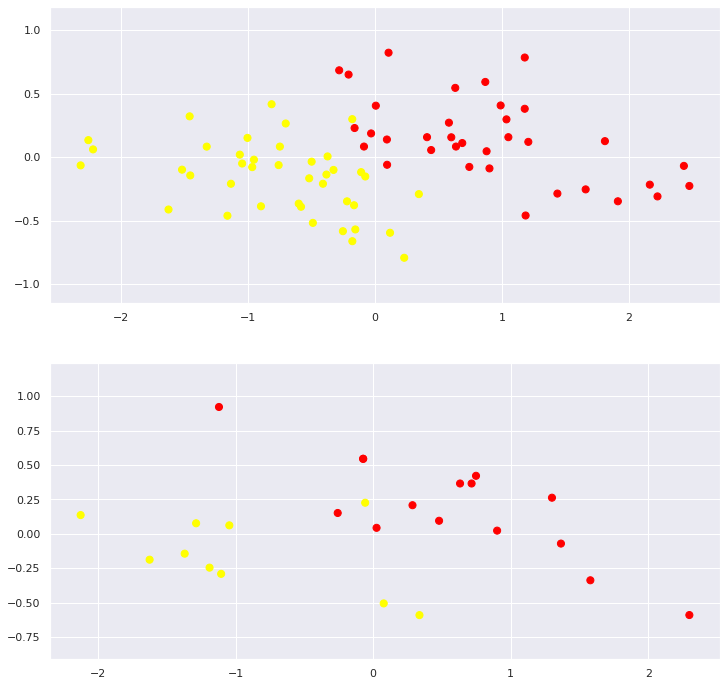

In [12]:
plt.subplots(figsize=(12, 12))
plt.subplot(2,1,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.axis('equal')
plt.subplot(2,1,2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plt.axis('equal')
plt.show()

---
## Task 3: Decision Tree Classifier [8 points]

This process of fitting a decision tree to our data can be done in Scikit-Learn with the ``DecisionTreeClassifier`` estimator. Your task is to implement the classifier using Scikit-Learn. See: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Also, tune the classifier: accuracy of over 80% should be achievable. 

In [13]:
### Task 3: your code goes here
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion="entropy",random_state=0,min_samples_split=4)
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
# 
# 
# replace the line below with the prediction of your model


Let's write a quick utility function to help us visualize the output of the classifier:

Now we can examine what the decision tree classification looks like, and compute the prediciton on the test set. 

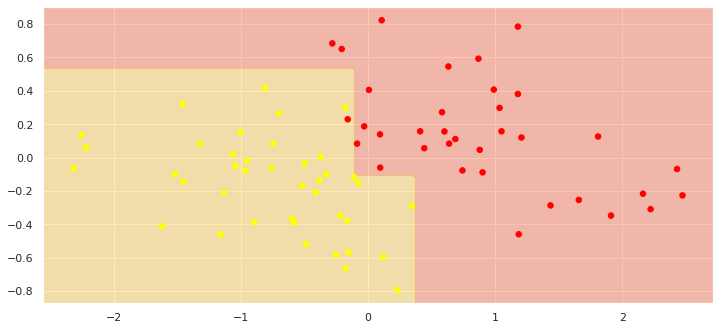

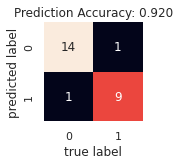

In [14]:
plt.subplots(figsize=(12, 12))
plt.subplot(2,1,1)
visualize_classifier(tree, X_train, y_train, cmap='autumn')
plt.show()

plt.subplot(2,1,2)
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Prediction Accuracy: %1.3f" %accuracy_score(y_test, y_pred));

### Document Task 3 [2 points of 8]
Here, I imported the inbuilt DecisionTreeClassifier from sklearn and trained the model by using PCA 2D data and changed the criteria="Entrophy" and min_samples_split=4 to achieve the better accuracy.